In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!python filterdata.py

In [4]:
data=pd.read_csv('input.csv')

In [5]:
data['iso_code'].value_counts()

CHN    856
IND    848
BGD    810
Name: iso_code, dtype: int64

In [6]:
data.shape

(2514, 67)

In [7]:
data.shape

(2514, 67)

In [8]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [9]:
data=data.drop(['continent','location'],axis=1)

In [10]:
p=data.isna().all()
null_cols=p[p==True].index.to_list()
null_cols

['icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'excess_mortality_cumulative_absolute',
 'excess_mortality_cumulative',
 'excess_mortality',
 'excess_mortality_cumulative_per_million']

In [11]:
data=data.drop(null_cols,axis=1)

In [12]:
def func(x):
    if(x.dtype=='float64'):
        return (x-x.shift()).sum()
    return 1000000

In [13]:
p=data.groupby(['iso_code']).agg(func)
p

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,
BGD,1000000,1953353.0,25.0,30.714,29129.0,-1.0,0.000,11745.712,0.150,0.184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHN,1000000,1201351.0,3344.0,3594.857,5209.0,4.0,-15.715,831.836,2.315,2.489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IND,1000000,43147529.0,2709.0,2243.571,524538.0,-1814.0,328.857,30965.443,1.944,1.610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
x=p.sum()
same_valued_cols=x[x==0].index.to_list()
same_valued_cols

['population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index']

In [15]:
data=data.drop(same_valued_cols,axis=1)

In [16]:
similar_cols=[[col[:(col.find('_per_million'))^(col.find('_per_thousand'))^(col.find('_per_hundred'))],col] for col in data if((col.find('_per_million')!=-1)|(col.find('_per_thousand')!=-1)|(col.find('_per_hundred')!=-1))]
similar_cols

[['total_cases', 'total_cases_per_million'],
 ['new_cases', 'new_cases_per_million'],
 ['new_cases_smoothed', 'new_cases_smoothed_per_million'],
 ['total_deaths', 'total_deaths_per_million'],
 ['new_deaths', 'new_deaths_per_million'],
 ['new_deaths_smoothed', 'new_deaths_smoothed_per_million'],
 ['total_tests', 'total_tests_per_thousand'],
 ['new_tests', 'new_tests_per_thousand'],
 ['new_tests_smoothed', 'new_tests_smoothed_per_thousand'],
 ['total_vaccinations', 'total_vaccinations_per_hundred'],
 ['people_vaccinated', 'people_vaccinated_per_hundred'],
 ['people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'],
 ['total_boosters', 'total_boosters_per_hundred'],
 ['new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million'],
 ['new_people_vaccinated_smoothed',
  'new_people_vaccinated_smoothed_per_hundred']]

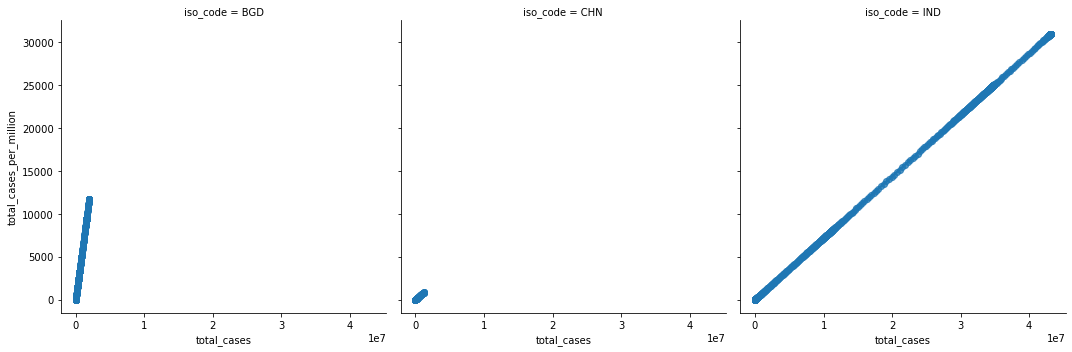

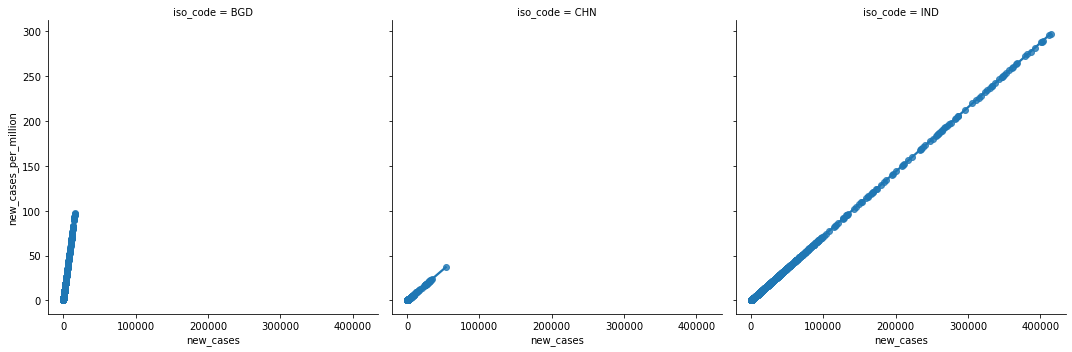

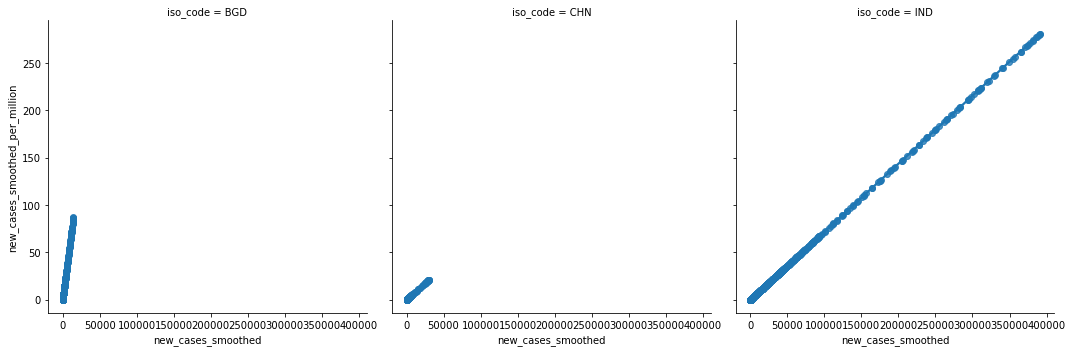

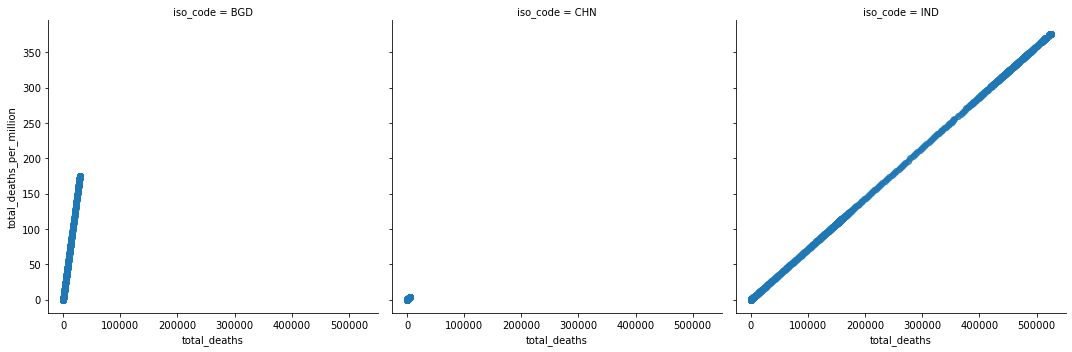

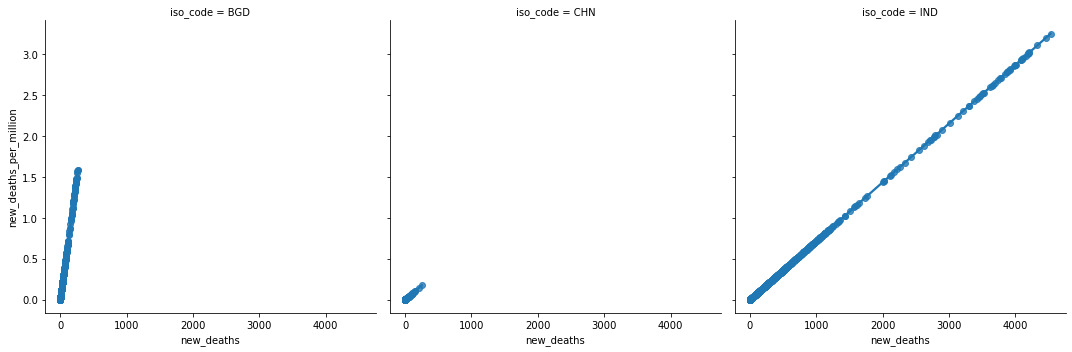

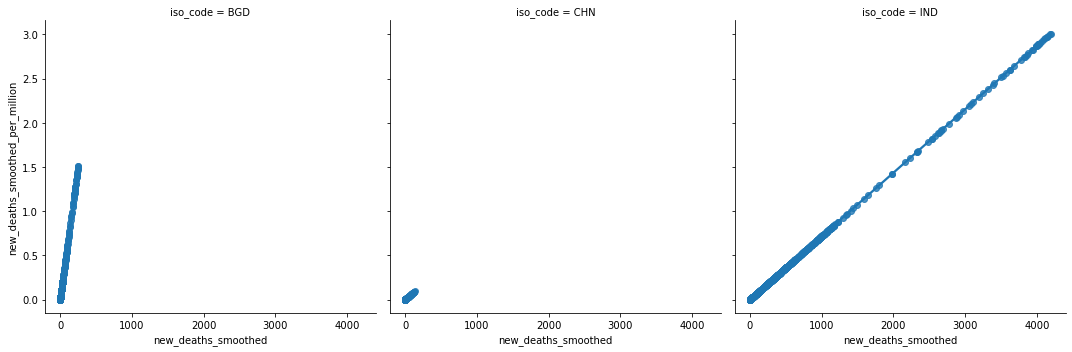

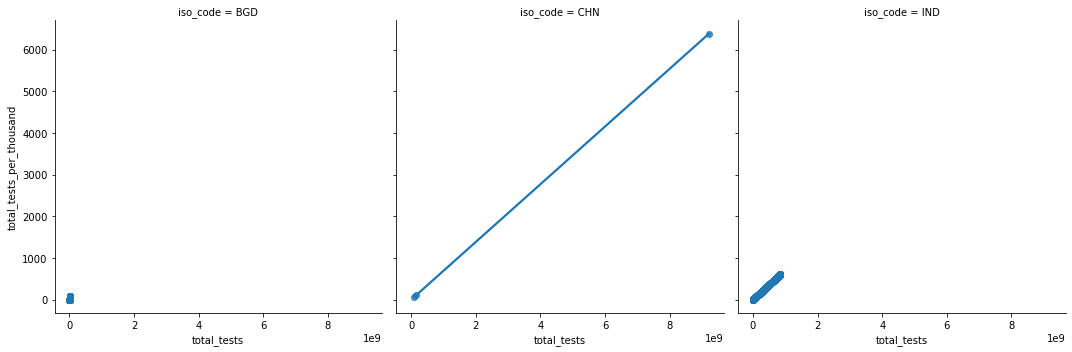

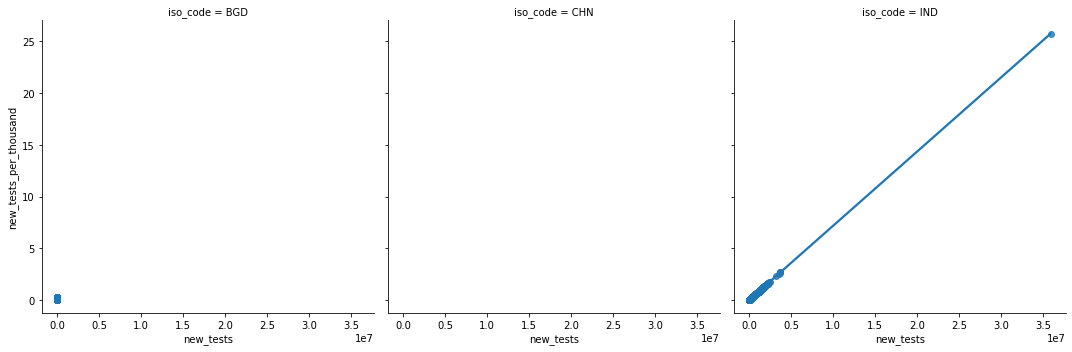

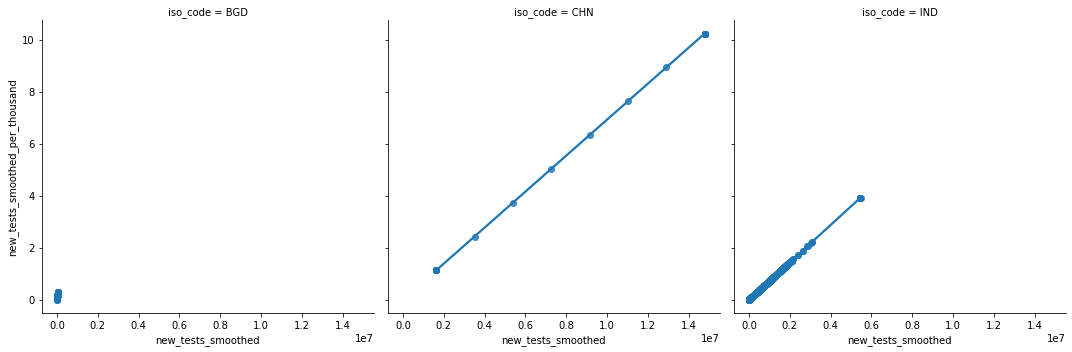

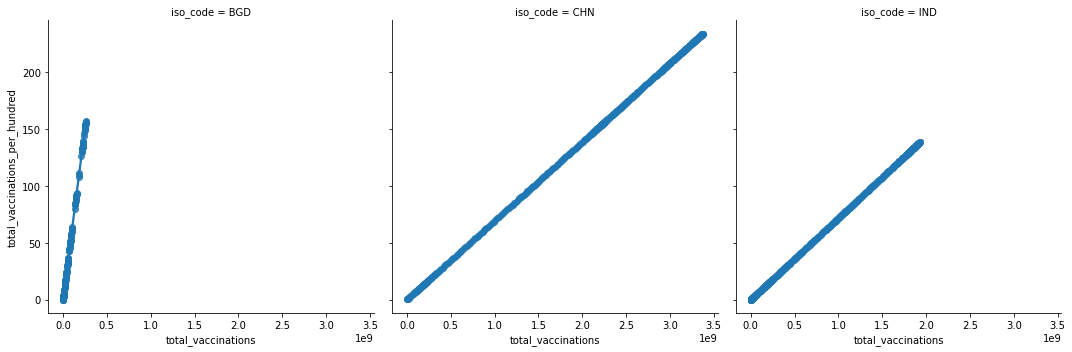

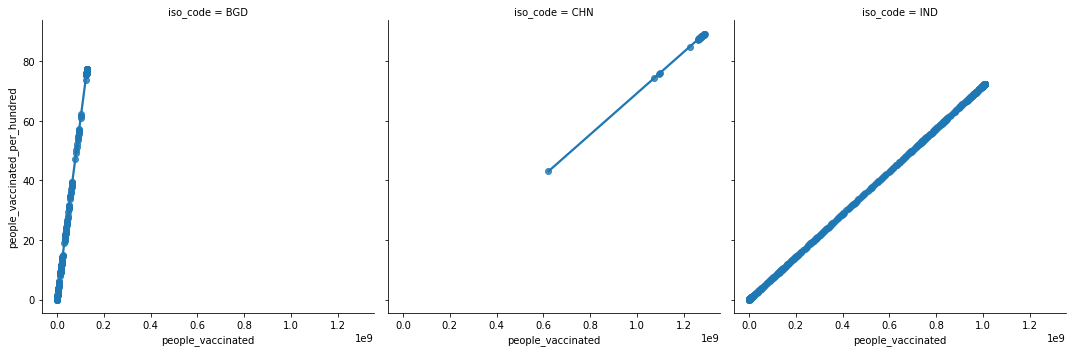

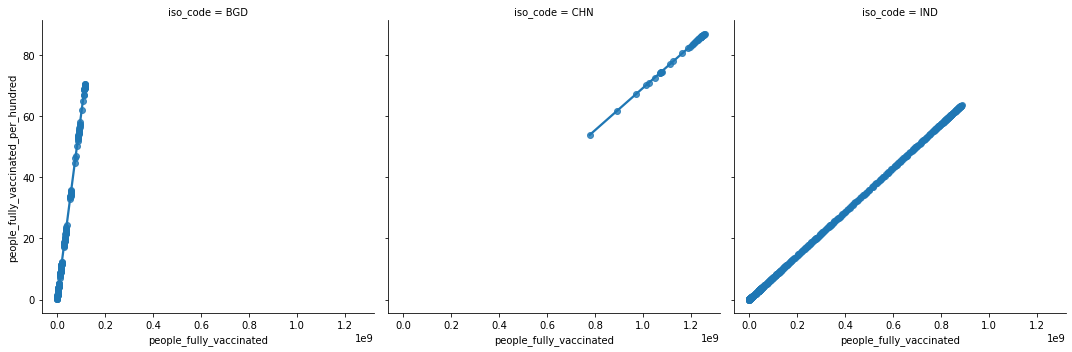

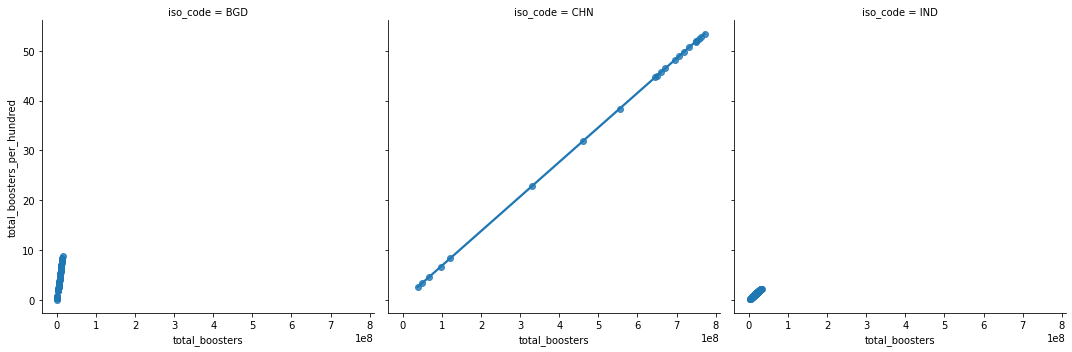

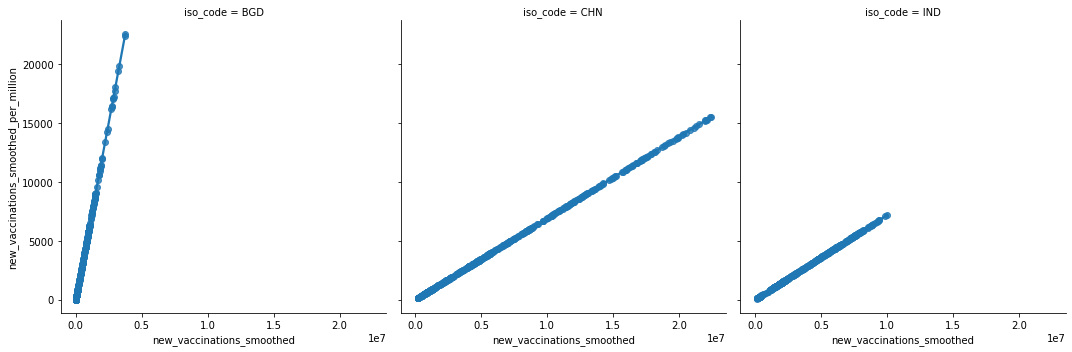

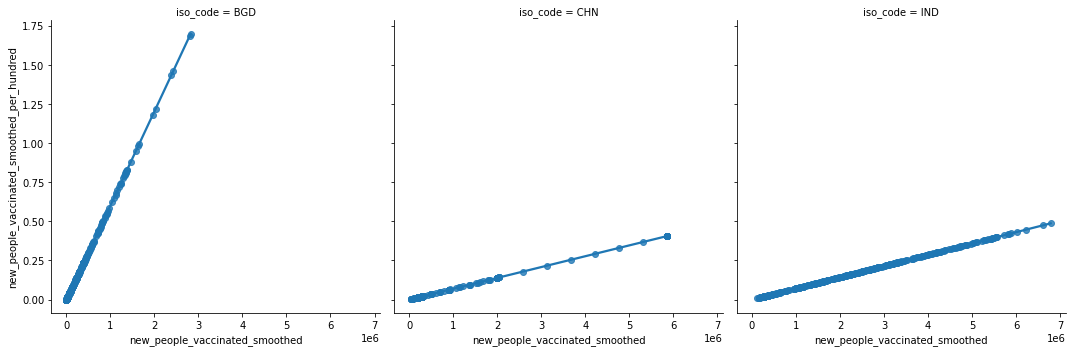

In [17]:
for x,y in similar_cols:
    sns.lmplot(x=x,y=y,data=data,col='iso_code')

In [18]:
data.drop([i[1] for i in similar_cols],axis=1,inplace=True)

In [19]:
smoothed_cols=[[col[:(col.find('_smoothed'))],col] for col in data if((col.find('_smoothed')!=-1)&(col[:(col.find('_smoothed'))] in data))]
smoothed_cols

[['new_cases', 'new_cases_smoothed'],
 ['new_deaths', 'new_deaths_smoothed'],
 ['new_tests', 'new_tests_smoothed'],
 ['new_vaccinations', 'new_vaccinations_smoothed']]

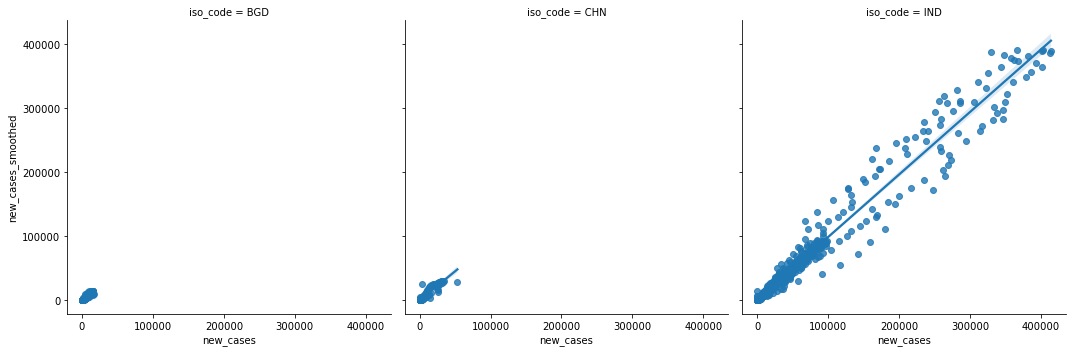

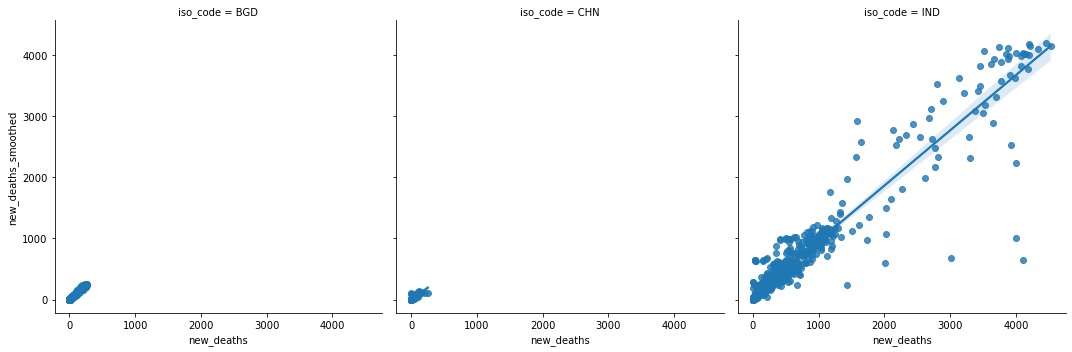

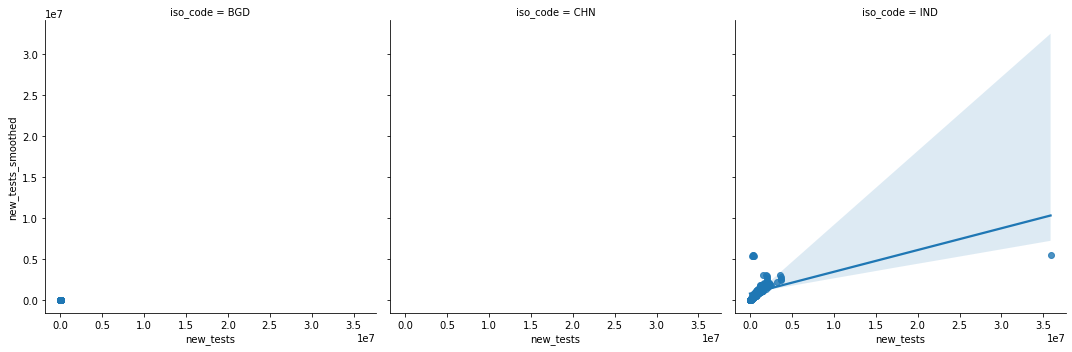

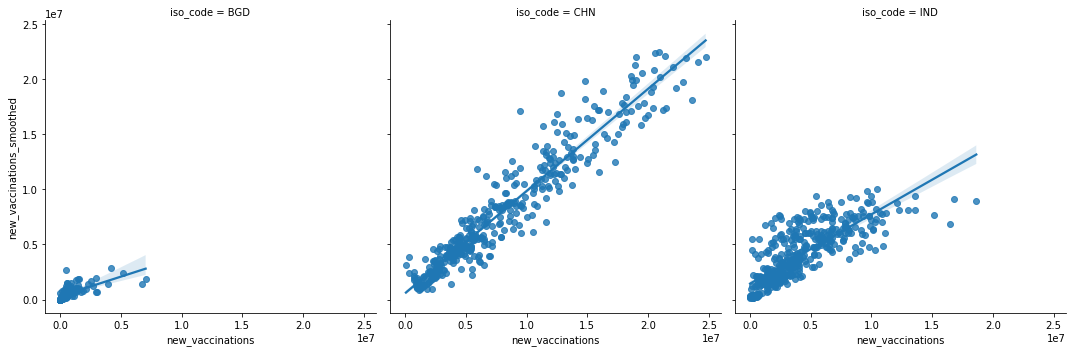

In [20]:
for x,y in smoothed_cols:
    sns.lmplot(x=x,y=y,data=data,col='iso_code')

In [21]:
total_and_new=list({col[6:] for col in data if(col.find('total_')!=-1)}.intersection({col[4:] for col in data if(col.find('new_')!=-1)}))
total_and_new

['cases', 'vaccinations', 'deaths', 'tests']

In [22]:
p=data.groupby(['iso_code'])

In [23]:
for i in total_and_new:
    print(((data['total_'+i]-p['total_'+i].shift(1))==data['new_'+i]).sum(),((data['total_'+i]-p['total_'+i].shift(1))==data['new_'+i]).sum()+data['new_'+i].isna().sum(),data['new_'+i].isna().sum(),data['total_'+i].isna().sum())

2509 2512 3 0
1061 2514 1453 1329
2455 2512 57 51
1478 2493 1015 997


In [24]:
for i in total_and_new:
    data['new_'+i].fillna(data['total_'+i]-p['total_'+i].shift(1),inplace=True)

In [25]:
data.drop(['total_'+col for col in total_and_new],axis=1,inplace=True)

In [26]:
p=data.isna().sum()
p

iso_code                             0
date                                 0
new_cases                            1
new_cases_smoothed                  23
new_deaths                          52
new_deaths_smoothed                 72
reproduction_rate                   97
new_tests                         1015
new_tests_smoothed                 290
positive_rate                      299
tests_per_case                     299
tests_units                        269
people_vaccinated                 1744
people_fully_vaccinated           1798
total_boosters                    2312
new_vaccinations                  1453
new_vaccinations_smoothed         1009
new_people_vaccinated_smoothed    1189
stringency_index                    44
dtype: int64

In [27]:
majority_null_cols=p[p>1100].index.to_list()+['new_vaccinations_smoothed']
majority_null_cols

['people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_people_vaccinated_smoothed',
 'new_vaccinations_smoothed']

In [28]:
data=data.drop(majority_null_cols,axis=1)

In [29]:
p=data.isna().sum()
(pd.concat([data['iso_code'],data[p[p>200].index.to_list()].isna()],axis=1)).groupby(['iso_code']).sum()

,new_tests,new_tests_smoothed,positive_rate,tests_per_case,tests_units
iso_code,,,,,
BGD,79,33,34,34,26
CHN,856,206,206,206,199
IND,80,51,59,59,44


<AxesSubplot:>

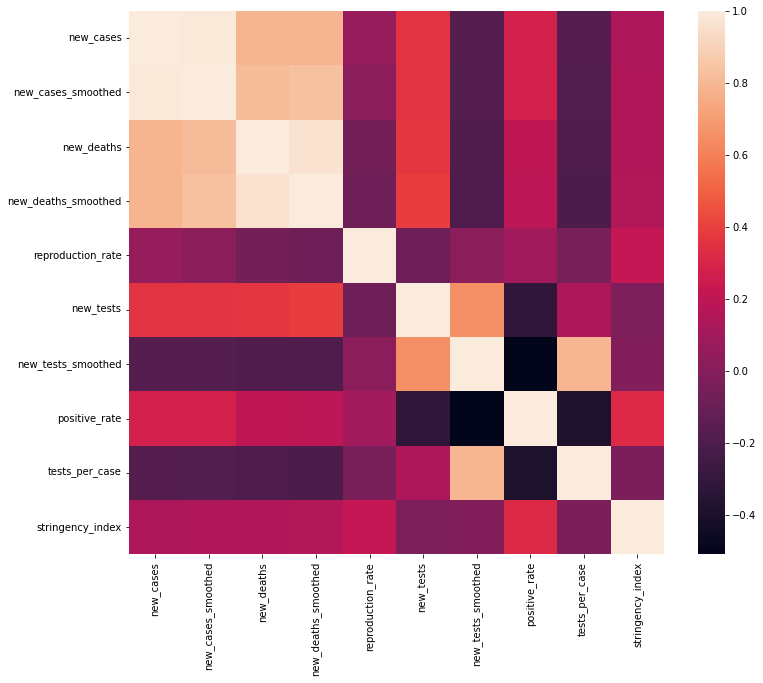

In [30]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr())

In [31]:
data.drop(['new_cases_smoothed'],inplace=True,axis=1)

In [32]:
data.date=pd.to_datetime(data.date)

In [33]:
final_data=data.drop(['date'],axis=1)
final_data['day']=data.date.dt.day
final_data['month']=data.date.dt.month
final_data['year']=data.date.dt.year

In [34]:
final_data=final_data[final_data['new_cases'].isna()==False]

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
objects=['iso_code','tests_units']
encodings=[]
for col in objects:
    encoding=OneHotEncoder(sparse=False).fit_transform(data[col].to_numpy().reshape(-1, 1))
    colnames=final_data[col].unique()
    encodings.append(pd.DataFrame(encoding,columns=colnames))
final_data=final_data.drop(objects,axis=1)
encodings=pd.concat(encodings,axis=1)
final_data=pd.concat([final_data,encodings],axis=1)

In [37]:
data

,iso_code,date,new_cases,new_deaths,new_deaths_smoothed,reproduction_rate,new_tests,new_tests_smoothed,positive_rate,tests_per_case,tests_units,stringency_index
0,BGD,2020-03-08,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89
1,BGD,2020-03-09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89
2,BGD,2020-03-10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89
3,BGD,2020-03-11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89
4,BGD,2020-03-12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89
...,...,...,...,...,...,...,...,...,...,...,...,...
2509,IND,2022-05-22,2022.0,46.0,31.143,NaN,442681.0,430637.0,0.0048,206.6,samples tested,NaN
2510,IND,2022-05-23,1675.0,31.0,32.857,NaN,294812.0,422581.0,0.0050,201.3,samples tested,NaN
2511,IND,2022-05-24,2124.0,17.0,30.571,NaN,407626.0,429745.0,0.0050,200.6,samples tested,NaN
2512,IND,2022-05-25,2628.0,18.0,31.714,NaN,458924.0,433168.0,0.0050,198.7,samples tested,NaN


In [38]:
final_data

,new_cases,new_deaths,new_deaths_smoothed,reproduction_rate,new_tests,new_tests_smoothed,positive_rate,tests_per_case,stringency_index,day,month,year,BGD,CHN,IND,NaN,tests performed,samples tested
0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,8.0,3.0,2020.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,9.0,3.0,2020.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,10.0,3.0,2020.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,11.0,3.0,2020.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,12.0,3.0,2020.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,1675.0,31.0,32.857,NaN,294812.0,422581.0,0.005,201.3,NaN,23.0,5.0,2022.0,0.0,0.0,1.0,1.0,0.0,0.0
2511,2124.0,17.0,30.571,NaN,407626.0,429745.0,0.005,200.6,NaN,24.0,5.0,2022.0,0.0,0.0,1.0,1.0,0.0,0.0
2512,2628.0,18.0,31.714,NaN,458924.0,433168.0,0.005,198.7,NaN,25.0,5.0,2022.0,0.0,0.0,1.0,1.0,0.0,0.0
2513,2710.0,14.0,30.857,NaN,NaN,NaN,NaN,NaN,NaN,26.0,5.0,2022.0,0.0,0.0,1.0,0.0,0.0,1.0


In [39]:
!pip install xgboost

In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

In [41]:
cols=final_data.columns
final_data=IterativeImputer().fit_transform(final_data)
final_data=pd.DataFrame(final_data,columns=cols)

In [42]:
y=final_data['new_cases']
X=final_data.drop(['new_cases'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
params_xgb={
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.4,0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'n_estimators': [100,500,1000,1500,2000]
        }

In [45]:
xgb=RandomizedSearchCV(XGBRegressor(),params_xgb,random_state=0,n_jobs=-1)
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

0.9920944418045745

In [46]:
xgb.best_params_

{'subsample': 0.8,
 'n_estimators': 500,
 'min_child_weight': 10,
 'gamma': 1,
 'colsample_bytree': 0.8}

In [47]:
cols=data.columns
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [48]:
lr=LinearRegression(n_jobs=-1)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6550712425365962

In [49]:
params_ridge={
        'alpha': [0.1,1,10,100,1000]
        }

In [50]:
ridge=RandomizedSearchCV(Ridge(),params_ridge,random_state=0)
ridge.fit(X_train,y_train)
ridge.score(X_test,y_test)

0.6488812325243634

In [51]:
ridge.best_params_

{'alpha': 100}

In [52]:
!pip install pmdarima

In [53]:
import pmdarima as pm

In [54]:
import os
import joblib

In [55]:
BGD=final_data[final_data['BGD']==1]
CHN=final_data[final_data['CHN']==1]
IND=final_data[final_data['IND']==1]

In [56]:
cols=['new_deaths','new_deaths_smoothed','reproduction_rate','new_tests','new_tests_smoothed','positive_rate','tests_per_case','stringency_index','tests performed','samples tested']
folder='models/'
models={}
if (os.path.exists(folder)==False):
    for col in cols:
        d_BGD=BGD[col]
        d_CHN=CHN[col]
        d_IND=IND[col]
        BGD_model=pm.auto_arima(y=d_BGD,m=1)
        CHN_model=pm.auto_arima(y=d_CHN,m=1)
        IND_model=pm.auto_arima(y=d_IND,m=1)
        models[col]={'BGD':BGD_model,'CHN':CHN_model,'IND':IND_model}
    os.mkdir(folder)
    for col,models_ in models.items():
        file_name_pfx=col+'_'
        for country,model in models_.items():
            file_name=file_name_pfx+country+'.pkl'
            file_path=folder+file_name
            joblib.dump(model, file_path)
else:
    for file_name in os.listdir(folder):
        p=file_name[:-4]
        country=p[-3:]
        feature=p[:-4]
        if feature in models:
            models[feature][country]=joblib.load(folder+file_name)
        else:
            models[feature]={country:joblib.load(folder+file_name)}

In [57]:
start=pd.to_datetime('26-05-2022')
end=pd.to_datetime('26-08-2022')

In [58]:
feats_to_gen=(end-start).days+1

In [59]:
dates=pd.date_range(start,end).to_series()

In [60]:
features=[]
for col in cols:
    d_BGD=pd.Series(models[col]['BGD'].predict(feats_to_gen),name=col)
    d_CHN=pd.Series(models[col]['CHN'].predict(feats_to_gen),name=col)
    d_IND=pd.Series(models[col]['IND'].predict(feats_to_gen),name=col)
    d=[d_BGD,d_CHN,d_IND]
    features.append(d)
features.append([dates.dt.day.rename('day'),dates.dt.day.rename('day'),dates.dt.day.rename('day')])
features.append([dates.dt.month.rename('month'),dates.dt.month.rename('month'),dates.dt.month.rename('month')])
features.append([dates.dt.year.rename('year'),dates.dt.year.rename('year'),dates.dt.year.rename('year')])
features.append([pd.Series([1 for i in range(feats_to_gen)],name='BGD'),pd.Series([0 for i in range(feats_to_gen)],name='BGD'),pd.Series([0 for i in range(feats_to_gen)],name='BGD')])
features.append([pd.Series([0 for i in range(feats_to_gen)],name='CHN'),pd.Series([1 for i in range(feats_to_gen)],name='CHN'),pd.Series([0 for i in range(feats_to_gen)],name='CHN')])
features.append([pd.Series([0 for i in range(feats_to_gen)],name='IND'),pd.Series([0 for i in range(feats_to_gen)],name='IND'),pd.Series([1 for i in range(feats_to_gen)],name='IND')])

In [61]:
for i in range(len(features)):
    features[i]=pd.concat(features[i],axis=0).reset_index().drop('index',axis=1)

In [62]:
features=pd.concat(features,axis=1)
features['NaN']=0

In [63]:
c=['tests performed','samples tested']
to_move=features[c]
features.drop(c,axis=1,inplace=True)
features=pd.concat([features,to_move],axis=1)

In [64]:
features

,new_deaths,new_deaths_smoothed,reproduction_rate,new_tests,new_tests_smoothed,positive_rate,tests_per_case,stringency_index,day,month,year,BGD,CHN,IND,NaN,tests performed,samples tested
0,0.323770,0.458454,0.874024,3711.295341,1.193000e+03,0.098320,-3.508556,55.040688,26,5,2022,1,0,0,0,1.0,0.000000
1,0.264105,0.536485,0.878307,3454.308921,1.193000e+03,0.112382,-3.508556,55.040688,27,5,2022,1,0,0,0,1.0,0.000000
2,0.273544,0.552465,0.880076,3988.392288,1.193000e+03,0.125415,-3.508556,55.040688,28,5,2022,1,0,0,0,1.0,0.000000
3,0.423088,0.547821,0.881069,4251.149735,1.193000e+03,0.137492,-3.508556,55.040688,29,5,2022,1,0,0,0,1.0,0.000000
4,0.398239,0.566050,0.881542,4370.354183,1.193000e+03,0.148685,-3.508556,55.040688,30,5,2022,1,0,0,0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,11.127782,46.050473,-0.758579,684534.210779,1.558862e+06,-0.582369,10892.147994,-96.266290,22,8,2022,0,0,1,0,0.0,2.478386
275,11.124626,46.050997,-0.758579,684534.210779,1.549648e+06,-0.583335,10892.147994,-96.908488,23,8,2022,0,0,1,0,0.0,2.495123
276,11.121651,46.051477,-0.758579,684534.210779,1.540655e+06,-0.584287,10892.147994,-98.160448,24,8,2022,0,0,1,0,0.0,2.511861
277,11.118847,46.051918,-0.758579,684534.210779,1.531874e+06,-0.585226,10892.147994,-98.638932,25,8,2022,0,0,1,0,0.0,2.528598


In [65]:
result_xgb=xgb.predict(features)
result_lr=lr.predict(features)
result_ridge=ridge.predict(features)

In [70]:
# result_xgb.reshape(-1,3),result_lr.reshape(-1,3),result_ridge.reshape(-1,3)

In [67]:
result_xgb

array([ -447.48932,   543.34607,   319.9155 ,   247.31902,   948.3306 ,
        1084.9763 ,   663.6457 ,   801.0329 ,   705.2431 ,   812.693  ,
         820.0502 ,  1174.695  ,   952.3409 ,  1045.2904 ,   953.3585 ,
         893.0061 ,  1078.6888 ,   914.9432 ,   997.52075,  3450.4854 ,
        3915.527  ,  2989.1956 ,  3239.4397 ,  3752.0935 ,  3783.267  ,
        3960.1404 ,  4018.5474 ,  3676.5684 ,  3533.7065 ,  3520.1707 ,
        3674.9365 ,  4487.5884 ,  4707.087  ,  4873.9067 ,  4727.4966 ,
        4217.87   ,  3705.556  ,  3855.5632 ,  4208.093  ,  4364.4136 ,
        4422.254  ,  4553.     ,  4017.4873 ,  3878.8066 ,  4077.4312 ,
        4005.0684 ,  4107.1475 ,  4255.73   ,  4234.212  ,  4269.497  ,
        4366.0024 ,  3748.4343 ,  3998.68   ,  4647.3174 ,  4789.476  ,
        4831.466  ,  4570.957  ,  4137.6904 ,  4195.141  ,  4195.141  ,
        4485.895  ,  5382.445  ,  5380.9966 ,  5109.5283 ,  4949.5825 ,
        4688.296  ,  4501.3516 ,  4287.735  ,  4510.9414 ,  4478

In [68]:
result_lr

array([ 4.24267250e+08,  3.78414381e+08,  4.73711643e+08,  5.20598665e+08,
        5.41868795e+08,  6.12633575e+08,  5.81716309e+08,  4.28116175e+08,
        3.82856377e+08,  4.73630124e+08,  5.19876148e+08,  5.42186853e+08,
        6.08538024e+08,  5.78365594e+08,  4.31407275e+08,  3.87484247e+08,
        4.73334570e+08,  5.19476493e+08,  5.42177071e+08,  6.04862515e+08,
        5.74972334e+08,  4.34726686e+08,  3.91759486e+08,  4.73282988e+08,
        5.18944787e+08,  5.42225062e+08,  6.01219536e+08,  5.71852163e+08,
        4.37785423e+08,  3.95956160e+08,  4.73222791e+08,  5.18500896e+08,
        5.42135815e+08,  5.97783043e+08,  5.68831249e+08,  4.40741905e+08,
        3.99927561e+08,  4.73253008e+08,  5.18015596e+08,  5.41999582e+08,
        5.94436915e+08,  5.65967691e+08,  4.43511310e+08,  4.03784669e+08,
        4.73340956e+08,  5.17580907e+08,  5.41806549e+08,  5.91256818e+08,
        5.63247300e+08,  4.46175142e+08,  4.07481493e+08,  4.73494733e+08,
        5.17150393e+08,  

In [69]:
result_ridge

array([ 1.05710581e+07,  1.07192650e+07,  1.04143051e+07,  1.02670768e+07,
        1.01992749e+07,  9.97075531e+06,  1.00548219e+07,  1.05494498e+07,
        1.06929580e+07,  1.04020330e+07,  1.02556071e+07,  1.01830868e+07,
        9.96954663e+06,  1.00686117e+07,  1.05410584e+07,  1.06813407e+07,
        1.04072302e+07,  1.02604398e+07,  1.01868295e+07,  9.98625118e+06,
        1.00841855e+07,  1.05345752e+07,  1.06725694e+07,  1.04124791e+07,
        1.02664465e+07,  1.01912642e+07,  1.00029810e+07,  1.00985263e+07,
        1.05288483e+07,  1.06637488e+07,  1.04170019e+07,  1.02716695e+07,
        1.01957711e+07,  1.00183217e+07,  1.01119513e+07,  1.05232150e+07,
        1.06381935e+07,  1.04036866e+07,  1.02598533e+07,  1.01832624e+07,
        1.00159817e+07,  1.01077117e+07,  1.05011859e+07,  1.06298167e+07,
        1.04070417e+07,  1.02649681e+07,  1.01878836e+07,  1.00299416e+07,
        1.01200627e+07,  1.04965387e+07,  1.06217866e+07,  1.04101382e+07,
        1.02701322e+07,  